In [1987]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, ConfusionMatrixDisplay, roc_curve, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from datetime import datetime
from tqdm import tqdm

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
import os
import pandas as pd
import glob
import joblib
import numpy as np
import seaborn as sns
import scipy.stats as scs
import matplotlib.pyplot as plt
import copy
import hashlib

In [2171]:
csv_files = glob.glob('*.{}'.format('csv'))
csv_files

['agustus_2021.csv',
 'oktober_2021.csv',
 'september_2021.csv',
 'november_2021.csv',
 'desember_2021.csv']

In [2172]:
df_append = pd.DataFrame()
# append all files together
for file in csv_files:
            df_temp = pd.read_csv(file)
            df_append = df_append.append(df_temp, ignore_index=True)
df_append

/var/folders/d1/6qk1n6ts36zb0kb689t4gg0r0000gn/T/ipykernel_14138/1880231868.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_append = df_append.append(df_temp, ignore_index=True)
/var/folders/d1/6qk1n6ts36zb0kb689t4gg0r0000gn/T/ipykernel_14138/1880231868.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_append = df_append.append(df_temp, ignore_index=True)
/var/folders/d1/6qk1n6ts36zb0kb689t4gg0r0000gn/T/ipykernel_14138/1880231868.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_append = df_append.append(df_temp, ignore_index=True)
/var/folders/d1/6qk1n6ts36zb0kb689t4gg0r0000gn/T/ipykernel_14138/1880231868.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,2021-08-01,DKI1 (Bunderan HI),51,68,25,8,29,22,68,PM25,SEDANG
1,2021-08-02,DKI1 (Bunderan HI),47,63,24,10,25,28,63,PM25,SEDANG
2,2021-08-03,DKI1 (Bunderan HI),50,68,26,11,19,35,68,PM25,SEDANG
3,2021-08-04,DKI1 (Bunderan HI),52,70,29,8,24,26,70,PM25,SEDANG
4,2021-08-05,DKI1 (Bunderan HI),52,66,29,9,21,27,66,PM25,SEDANG
...,...,...,...,...,...,...,...,...,...,...,...
760,2021-12-27,DKI5 (Kebon Jeruk) Jakarta Barat,54,76,36,14,21,47,76,PM25,SEDANG
761,2021-12-28,DKI5 (Kebon Jeruk) Jakarta Barat,44,68,20,11,21,33,68,PM25,SEDANG
762,2021-12-29,DKI5 (Kebon Jeruk) Jakarta Barat,34,54,28,8,25,29,54,PM25,SEDANG
763,2021-12-30,DKI5 (Kebon Jeruk) Jakarta Barat,53,75,25,15,23,44,75,PM25,SEDANG


In [1990]:
# Ganti kategori 'SEDANG' menjadi 'BAIK'
df_append['categori'] = df_append['categori'].replace(['SEDANG'], 'BAIK')
df_append

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,2021-10-01,DKI1 (Bunderan HI),57,81,30,11,32,38,81,PM25,BAIK
1,2021-10-02,DKI1 (Bunderan HI),67,99,32,11,30,35,99,PM25,BAIK
2,2021-10-03,DKI1 (Bunderan HI),70,85,29,10,28,28,85,PM25,BAIK
3,2021-10-04,DKI1 (Bunderan HI),58,82,30,11,34,29,82,PM25,BAIK
4,2021-10-05,DKI1 (Bunderan HI),55,76,29,11,30,33,76,PM25,BAIK
...,...,...,...,...,...,...,...,...,...,...,...
760,2021-08-27,DKI5 (Kebon Jeruk) Jakarta Barat,61,96,34,8,29,15,96,PM25,BAIK
761,2021-08-28,DKI5 (Kebon Jeruk) Jakarta Barat,63,100,31,8,44,12,100,PM25,BAIK
762,2021-08-29,DKI5 (Kebon Jeruk) Jakarta Barat,67,111,32,10,36,13,111,PM25,TIDAK SEHAT
763,2021-08-30,DKI5 (Kebon Jeruk) Jakarta Barat,83,126,35,16,32,29,126,PM25,TIDAK SEHAT


In [1991]:
# Copy data
dataset = df_append.copy()

dataset

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,2021-10-01,DKI1 (Bunderan HI),57,81,30,11,32,38,81,PM25,BAIK
1,2021-10-02,DKI1 (Bunderan HI),67,99,32,11,30,35,99,PM25,BAIK
2,2021-10-03,DKI1 (Bunderan HI),70,85,29,10,28,28,85,PM25,BAIK
3,2021-10-04,DKI1 (Bunderan HI),58,82,30,11,34,29,82,PM25,BAIK
4,2021-10-05,DKI1 (Bunderan HI),55,76,29,11,30,33,76,PM25,BAIK
...,...,...,...,...,...,...,...,...,...,...,...
760,2021-08-27,DKI5 (Kebon Jeruk) Jakarta Barat,61,96,34,8,29,15,96,PM25,BAIK
761,2021-08-28,DKI5 (Kebon Jeruk) Jakarta Barat,63,100,31,8,44,12,100,PM25,BAIK
762,2021-08-29,DKI5 (Kebon Jeruk) Jakarta Barat,67,111,32,10,36,13,111,PM25,TIDAK SEHAT
763,2021-08-30,DKI5 (Kebon Jeruk) Jakarta Barat,83,126,35,16,32,29,126,PM25,TIDAK SEHAT


In [1992]:
# Cek tipe object
dataset.dtypes

tanggal     object
stasiun     object
pm10        object
pm25        object
so2         object
co          object
o3          object
no2         object
max         object
critical    object
categori    object
dtype: object

In [1993]:
# Ganti tipe data tanggal dari object ke datetime
dataset.tanggal = pd.to_datetime(dataset.tanggal)

In [1994]:
dataset.dtypes

tanggal     datetime64[ns]
stasiun             object
pm10                object
pm25                object
so2                 object
co                  object
o3                  object
no2                 object
max                 object
critical            object
categori            object
dtype: object

In [1995]:
# Ganti data kosong menjadi int

dataset.pm10 = dataset.pm10.replace('---', -1).astype(int)
dataset.pm25 = dataset.pm25.replace('---', -1).astype(int)
dataset.so2 = dataset.so2.replace('---', -1).astype(int)
dataset.co = dataset.co.replace('---', -1).astype(int)
dataset.o3 = dataset.o3.replace('---', -1).astype(int)
dataset.no2 = dataset.no2.replace('---', -1).astype(int)

In [1996]:
dataset.dtypes

tanggal     datetime64[ns]
stasiun             object
pm10                 int64
pm25                 int64
so2                  int64
co                   int64
o3                   int64
no2                  int64
max                 object
critical            object
categori            object
dtype: object

In [1997]:
#Cek data max
dataset["max"] = dataset["max"].astype(int)

ValueError: invalid literal for int() with base 10: 'PM25'

In [1998]:
#Ada data max dg value 'PM25' yang seharusnya ada di kolom critical
dataset[dataset["max"] == "PM25"]

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
457,2021-12-03,DKI1 (Bunderan HI),49,31,9,19,7,49,PM25,BAIK,NaN


In [1999]:
# Memperbaiki data yang salah rumah
dataset.loc[457, 'max'] = 49
dataset.loc[457, 'critical'] = 'PM25'
dataset.loc[457, 'categori'] = 'BAIK'

In [2000]:
# Jadikan ke integer
dataset['max'] = dataset['max'].astype(int)

In [2001]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 765 entries, 0 to 764
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   tanggal   765 non-null    datetime64[ns]
 1   stasiun   765 non-null    object        
 2   pm10      765 non-null    int64         
 3   pm25      765 non-null    int64         
 4   so2       765 non-null    int64         
 5   co        765 non-null    int64         
 6   o3        765 non-null    int64         
 7   no2       765 non-null    int64         
 8   max       765 non-null    int64         
 9   critical  757 non-null    object        
 10  categori  765 non-null    object        
dtypes: datetime64[ns](1), int64(7), object(3)
memory usage: 65.9+ KB


In [2002]:
dataset.categori.value_counts()

BAIK              671
TIDAK SEHAT        86
TIDAK ADA DATA      8
Name: categori, dtype: int64

In [2003]:
# Drop 'TIDAK ADA DATA'
dataset.drop(index=dataset[dataset.categori == 'TIDAK ADA DATA'].index, inplace=True)

dataset.categori.value_counts()

BAIK           671
TIDAK SEHAT     86
Name: categori, dtype: int64

In [2004]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 757 entries, 0 to 764
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   tanggal   757 non-null    datetime64[ns]
 1   stasiun   757 non-null    object        
 2   pm10      757 non-null    int64         
 3   pm25      757 non-null    int64         
 4   so2       757 non-null    int64         
 5   co        757 non-null    int64         
 6   o3        757 non-null    int64         
 7   no2       757 non-null    int64         
 8   max       757 non-null    int64         
 9   critical  757 non-null    object        
 10  categori  757 non-null    object        
dtypes: datetime64[ns](1), int64(7), object(3)
memory usage: 71.0+ KB


In [2005]:
# DATA DEFENSE
def check_data(input_data, params):
    # check data types
    assert input_data.select_dtypes("datetime").columns.to_list() == params["datetime_columns"], "an error occurs in datetime column(s)."
    assert input_data.select_dtypes("object").columns.to_list() == params["object_columns"], "an error occurs in object column(s)."
    assert input_data.select_dtypes("int").columns.to_list() == params["int32_columns"], "an error occurs in int32 column(s)."

    # check range of data
    assert set(input_data.stasiun).issubset(set(params["range_stasiun"])), "an error occurs in stasiun range."
    assert input_data.pm10.between(params["range_pm10"][0], params["range_pm10"][1]).sum() == len(input_data), "an error occurs in pm10 range."
    assert input_data.pm25.between(params["range_pm25"][0], params["range_pm25"][1]).sum() == len(input_data), "an error occurs in pm25 range."
    assert input_data.so2.between(params["range_so2"][0], params["range_so2"][1]).sum() == len(input_data), "an error occurs in so2 range."
    assert input_data.co.between(params["range_co"][0], params["range_co"][1]).sum() == len(input_data), "an error occurs in co range."
    assert input_data.o3.between(params["range_o3"][0], params["range_o3"][1]).sum() == len(input_data), "an error occurs in o3 range."
    assert input_data.no2.between(params["range_no2"][0], params["range_no2"][1]).sum() == len(input_data), "an error occurs in no2 range."

In [2006]:
# DATA SPLITTING
params = dataset[['stasiun', 'pm10', 'pm25', 'so2', 'co', 'o3', 'no2']]

x = params.copy()
y = dataset.categori.copy()

In [2007]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 757 entries, 0 to 764
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   stasiun  757 non-null    object
 1   pm10     757 non-null    int64 
 2   pm25     757 non-null    int64 
 3   so2      757 non-null    int64 
 4   co       757 non-null    int64 
 5   o3       757 non-null    int64 
 6   no2      757 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 47.3+ KB


In [2008]:
y.value_counts()

BAIK           671
TIDAK SEHAT     86
Name: categori, dtype: int64

In [2009]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42, stratify = y)

In [2010]:
x_valid, x_test, y_valid, y_test = train_test_split(x_test, y_test, test_size = 0.5, random_state = 42, stratify = y_test)

In [2011]:
y_train

251    BAIK
474    BAIK
203    BAIK
585    BAIK
386    BAIK
       ... 
332    BAIK
313    BAIK
49     BAIK
111    BAIK
680    BAIK
Name: categori, Length: 529, dtype: object

In [2012]:
joblib.dump(x_train, "/Users/avntrr/Documents/Pacmann/x_train.pkl")
joblib.dump(y_train, "/Users/avntrr/Documents/Pacmann/y_train.pkl")
joblib.dump(x_valid, "/Users/avntrr/Documents/Pacmann/x_valid.pkl")
joblib.dump(y_valid, "/Users/avntrr/Documents/Pacmann/y_valid.pkl")
joblib.dump(x_test, "/Users/avntrr/Documents/Pacmann/x_test.pkl")
joblib.dump(y_test, "/Users/avntrr/Documents/Pacmann/y_test.pkl")

['/Users/avntrr/Documents/Pacmann/y_test.pkl']

In [2013]:
x_train = joblib.load("/Users/avntrr/Documents/Pacmann/x_train.pkl")
y_train = joblib.load("/Users/avntrr/Documents/Pacmann/y_train.pkl")

In [2014]:
x_train

,stasiun,pm10,pm25,so2,co,o3,no2
251,DKI4 (Lubang Buaya),56,86,42,8,21,21
474,DKI1 (Bunderan HI),52,63,39,13,23,11
203,DKI2 (Kelapa Gading),52,73,50,8,68,10
585,DKI5 (Kebon Jeruk) Jakarta Barat,25,44,22,5,15,21
386,DKI3 (Jagakarsa),29,41,42,4,27,6
...,...,...,...,...,...,...,...
332,DKI1 (Bunderan HI),19,20,29,5,14,4
313,DKI1 (Bunderan HI),55,73,32,14,17,38
49,DKI2 (Kelapa Gading),46,63,60,16,42,29
111,DKI4 (Lubang Buaya),52,80,41,18,31,23


In [2015]:
y_train

251    BAIK
474    BAIK
203    BAIK
585    BAIK
386    BAIK
       ... 
332    BAIK
313    BAIK
49     BAIK
111    BAIK
680    BAIK
Name: categori, Length: 529, dtype: object

In [2016]:
dataset = pd.concat([x_train, y_train], axis=1)

dataset

,stasiun,pm10,pm25,so2,co,o3,no2,categori
251,DKI4 (Lubang Buaya),56,86,42,8,21,21,BAIK
474,DKI1 (Bunderan HI),52,63,39,13,23,11,BAIK
203,DKI2 (Kelapa Gading),52,73,50,8,68,10,BAIK
585,DKI5 (Kebon Jeruk) Jakarta Barat,25,44,22,5,15,21,BAIK
386,DKI3 (Jagakarsa),29,41,42,4,27,6,BAIK
...,...,...,...,...,...,...,...,...
332,DKI1 (Bunderan HI),19,20,29,5,14,4,BAIK
313,DKI1 (Bunderan HI),55,73,32,14,17,38,BAIK
49,DKI2 (Kelapa Gading),46,63,60,16,42,29,BAIK
111,DKI4 (Lubang Buaya),52,80,41,18,31,23,BAIK


In [2017]:
# CEK MISSING VALUE
# Mengembalikan nilai -1 ke NaN
dataset.replace(-1, np.nan, inplace = True)

In [2018]:
# cek null
dataset.isnull().sum()

stasiun      0
pm10        15
pm25         8
so2         53
co           1
o3          16
no2          1
categori     0
dtype: int64

In [2019]:
# cek skewness
dataset.skew(numeric_only=True)

pm10    1.030584
pm25    0.050287
so2    -0.261842
co      0.850311
o3      0.810742
no2     1.163981
dtype: float64

In [2020]:
# kolom co, o3, dan no2 akan diimputasi dengan median
# kolom pm10, pm25, dan so2 diimputasi dengan mean
# pisahkan dulu dataset menjadi 2 kelas: 'BAIK' dan 'TIDAK BAIK'

dataset_baik = dataset[dataset.categori == 'BAIK'].copy()
dataset_tidak_sehat = dataset[dataset.categori != 'BAIK'].copy()

In [2021]:
dataset_baik.describe()

,pm10,pm25,so2,co,o3,no2
count,462.000000,461.000000,419.000000,468.000000,454.000000,468.000000
mean,50.103896,72.006508,38.508353,10.698718,31.290749,19.978632
std,11.918106,16.776600,13.113301,4.101632,12.702542,9.751713
min,15.000000,20.000000,3.000000,2.000000,7.000000,4.000000
25%,45.000000,62.000000,29.000000,8.000000,22.000000,13.000000
50%,52.000000,74.000000,39.000000,10.000000,29.000000,18.000000
75%,58.000000,84.000000,49.000000,13.000000,39.000000,26.000000
max,87.000000,100.000000,81.000000,28.000000,78.000000,65.000000


In [2022]:
dataset_tidak_sehat.describe()

,pm10,pm25,so2,co,o3,no2
count,52.000000,60.000000,57.000000,60.000000,59.000000,60.000000
mean,70.365385,110.883333,43.403509,12.333333,34.288136,22.633333
std,17.208102,12.842054,8.963935,3.423085,11.513187,6.380496
min,56.000000,58.000000,17.000000,7.000000,15.000000,12.000000
25%,63.000000,103.000000,39.000000,10.000000,26.000000,18.000000
50%,67.500000,109.000000,42.000000,12.000000,32.000000,22.000000
75%,73.000000,116.250000,45.000000,14.000000,39.500000,25.250000
max,179.000000,157.000000,76.000000,23.000000,70.000000,41.000000


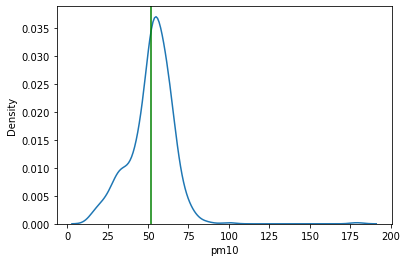

In [2023]:
# distribusi pm10 tanpa melihat categori
sns.kdeplot(data = dataset, x = "pm10")
plt.axvline(dataset.pm10.mean(), 0, 1, color = "g")

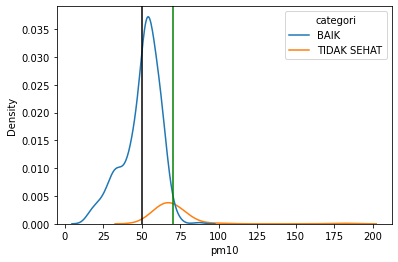

In [2024]:
# distribusi pm10 berdasarkan categori

sns.kdeplot(data = dataset, x = "pm10", hue = "categori")
plt.axvline(dataset_tidak_sehat.pm10.mean(), 0, 1, color = "g")
plt.axvline(dataset_baik.pm10.mean(), 0, 1, color = "k")

In [2025]:
# distribusi sedikit skew ke kanan namun tidak signifikan, imputasi mean
# mean 2 kelas berbeda jauh, imputasi berdasarkan kelas
# kesimpulan: untuk pm10 akan menggunakan mean dari perkelas untuk imputasi

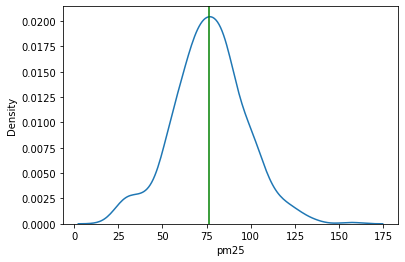

In [2026]:
sns.kdeplot(data = dataset, x = "pm25")
plt.axvline(dataset.pm25.mean(), 0, 1, color = "g")

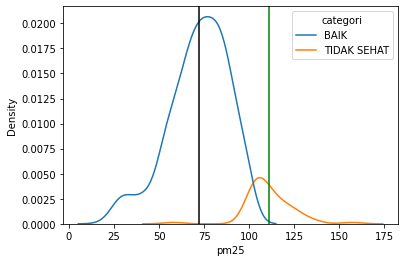

In [2027]:
sns.kdeplot(data = dataset, x = "pm25", hue = "categori")
plt.axvline(dataset_tidak_sehat.pm25.mean(), 0, 1, color = "g")
plt.axvline(dataset_baik.pm25.mean(), 0, 1, color = "k")

In [2028]:
# distribusi sangat dekat dengan normal (nilai skew fisher-pearson mendekati nol), imputasi mean
# mean 2 kelas berbeda jauh, imputasi berdasarkan kelas
# kesimpulan: untuk pm25 akan menggunakan mean dari perkelas untuk imputasi

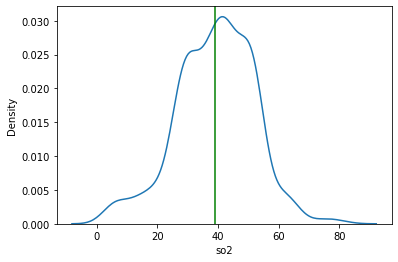

In [2029]:
sns.kdeplot(data = dataset, x = "so2")
plt.axvline(dataset.so2.mean(), 0, 1, color = "g")

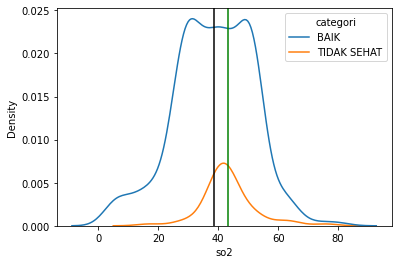

In [2030]:
sns.kdeplot(data = dataset, x = "so2", hue = "categori")
plt.axvline(dataset_tidak_sehat.so2.mean(), 0, 1, color = "g")
plt.axvline(dataset_baik.so2.mean(), 0, 1, color = "k")

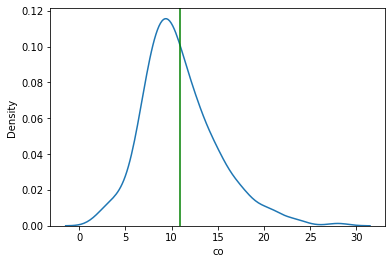

In [2031]:
sns.kdeplot(data = dataset, x = "co")
plt.axvline(dataset.co.mean(), 0, 1, color = "g")

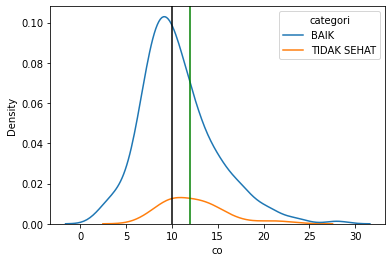

In [2032]:
sns.kdeplot(data = dataset, x = "co", hue = "categori")
plt.axvline(dataset_tidak_sehat.co.median(), 0, 1, color = "g")
plt.axvline(dataset_baik.co.median(), 0, 1, color = "k")

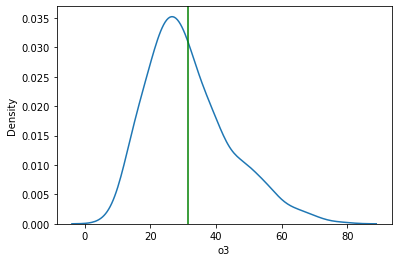

In [2033]:
sns.kdeplot(data = dataset, x = "o3")
plt.axvline(dataset.o3.mean(), 0, 1, color = "g")

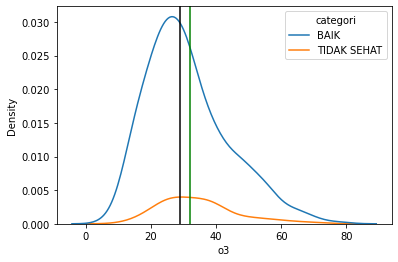

In [2034]:
sns.kdeplot(data = dataset, x = "o3", hue = "categori")
plt.axvline(dataset_tidak_sehat.o3.median(), 0, 1, color = "g")
plt.axvline(dataset_baik.o3.median(), 0, 1, color = "k")

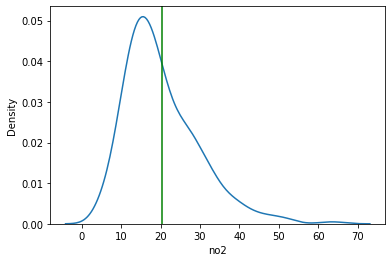

In [2035]:
sns.kdeplot(data = dataset, x = "no2")
plt.axvline(dataset.no2.mean(), 0, 1, color = "g")

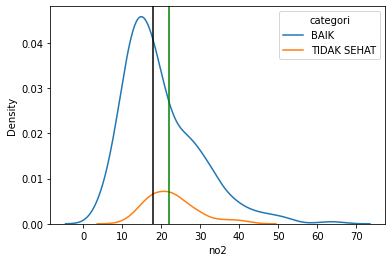

In [2036]:
sns.kdeplot(data = dataset, x = "no2", hue = "categori")
plt.axvline(dataset_tidak_sehat.no2.median(), 0, 1, color = "g")
plt.axvline(dataset_baik.no2.median(), 0, 1, color = "k")

In [2037]:
#PEARSON CORELATION

<AxesSubplot: >

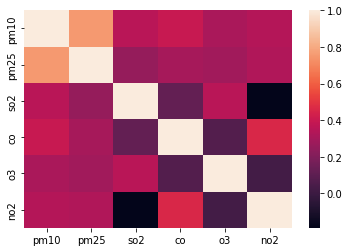

In [2038]:
sns.heatmap(dataset.corr())

In [2039]:
#T Test untuk PM10

# h0    = mean pm10 untuk kelas 0 = mean pm10 untuk kelas 1
# h1    = mean pm10 untuk kelas 0 != mean pm10 untuk kelas 1

In [2040]:
# perform t-test untuk 2 variabel
scs.ttest_ind(
    dataset_baik[dataset_baik.pm10.isnull() != True].pm10,
    dataset_tidak_baik[dataset_tidak_sehat.pm10.isnull() != True].pm10
)

Ttest_indResult(statistic=-11.041435047490316, pvalue=1.4291256251500423e-25)

In [2041]:
# nilai t critical untuk alpha 0.05
scs.t.ppf(0.05, df = (len(dataset) - 2))

-1.647750149859035

In [2042]:
# dengan nilai t-value < t-critical dan nilai p-value < 0.05 maka h0 di reject
# mean antara kelas 0 dan kelas 1 untuk pm10 statistically significant

In [2043]:
#T Test untuk PM25

# h0    = mean pm25 untuk kelas 0 = mean pm25 untuk kelas 1
# h1    = mean pm25 untuk kelas 0 != mean pm25 untuk kelas 1

In [2044]:
# perform t-test untuk 2 variabel
scs.ttest_ind(
    dataset_baik[dataset_baik.pm25.isnull() != True].pm25,
    dataset_tidak_baik[dataset_tidak_sehat.pm25.isnull() != True].pm25
)

Ttest_indResult(statistic=-17.296705454915987, pvalue=2.9065083801207474e-53)

In [2045]:
# nilai t critical untuk alpha 0.05
scs.t.ppf(0.05, df = (len(dataset) - 2))

-1.647750149859035

In [2046]:
# dengan nilai t-value < t-critical dan nilai p-value < 0.05 maka h0 di reject
# mean antara kelas 0 dan kelas 1 untuk pm25 statistically significant

In [2047]:
#T Test untuk SO2

# h0    = mean so2 untuk kelas 0 = mean so2 untuk kelas 1
# h1    = mean so2 untuk kelas 0 != mean so2 untuk kelas 1

In [2048]:
# perform t-test untuk 2 variabel
scs.ttest_ind(
    dataset_baik[dataset_baik.so2.isnull() != True].so2,
    dataset_tidak_baik[dataset_tidak_sehat.so2.isnull() != True].so2
)

Ttest_indResult(statistic=-2.731563106460483, pvalue=0.006538636879653997)

In [2049]:
# nilai t critical untuk alpha 0.05
scs.t.ppf(0.05, df = (len(dataset) - 2))

-1.647750149859035

In [2050]:
# dengan nilai t-value < t-critical dan nilai p-value < 0.05 maka h0 di reject
# mean antara kelas 0 dan kelas 1 untuk so2 statistically significant

In [2051]:
#T Test untuk CO

# h0    = mean co untuk kelas 0 = mean co untuk kelas 1
# h1    = mean co untuk kelas 0 != mean co untuk kelas 1

In [2052]:
# perform t-test untuk 2 variabel
scs.ttest_ind(
    dataset_baik[dataset_baik.co.isnull() != True].co,
    dataset_tidak_baik[dataset_tidak_sehat.co.isnull() != True].co
)

Ttest_indResult(statistic=-2.9570695094742323, pvalue=0.0032453230031381005)

In [2053]:
# nilai t critical untuk alpha 0.05
scs.t.ppf(0.05, df = (len(dataset) - 2))

-1.647750149859035

In [2054]:
# dengan nilai t-value < t-critical dan nilai p-value < 0.05 maka h0 di reject
# mean antara kelas 0 dan kelas 1 untuk co statistically significant

In [2055]:
#T Test untuk O3

# h0    = mean o3 untuk kelas 0 = mean o3 untuk kelas 1
# h1    = mean o3 untuk kelas 0 != mean o3 untuk kelas 1

In [2056]:
# perform t-test untuk 2 variabel
scs.ttest_ind(
    dataset_baik[dataset_baik.o3.isnull() != True].o3,
    dataset_tidak_baik[dataset_tidak_sehat.o3.isnull() != True].o3,
    equal_var = False
)

Ttest_indResult(statistic=-1.8581587521494367, pvalue=0.06694133596655341)

In [2057]:
# nilai t critical untuk alpha 0.05
scs.t.ppf(0.05, df = (len(dataset) - 2))

-1.647750149859035

In [2058]:
# dengan nilai t-value < t-critical dan nilai p-value < 0.05 maka h0 di reject
# mean antara kelas 0 dan kelas 1 untuk o3 statistically significant

In [2059]:
#T Test untuk NO2

# h0    = mean no2 untuk kelas 0 = mean no2 untuk kelas 1
# h1    = mean no2 untuk kelas 0 != mean no2 untuk kelas 1

In [2060]:
# perform t-test untuk 2 variabel
scs.ttest_ind(
    dataset_baik[dataset_baik.no2.isnull() != True].no2,
    dataset_tidak_baik[dataset_tidak_sehat.no2.isnull() != True].no2
)

Ttest_indResult(statistic=-2.052167258961387, pvalue=0.04064779633885892)

In [2061]:
# nilai t critical untuk alpha 0.05
scs.t.ppf(0.05, df = (len(dataset) - 2))

-1.647750149859035

In [2062]:
# dengan nilai t-value < t-critical dan nilai p-value < 0.05 maka h0 di reject
# mean antara kelas 0 dan kelas 1 untuk no2 statistically significant

<AxesSubplot: xlabel='categori', ylabel='Count'>

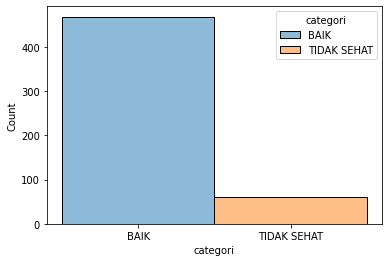

In [2063]:
#CEK IMBALANCE LABEL

sns.histplot(data = dataset, x = "categori", hue = "categori")

<AxesSubplot: xlabel='pm10'>

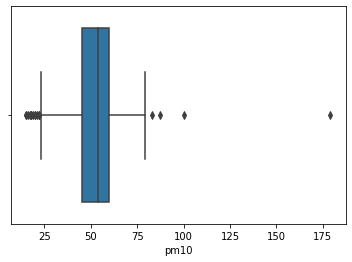

In [2064]:
#CEK OUTLIER

sns.boxplot(data = dataset, x = "pm10")

<AxesSubplot: xlabel='pm25'>

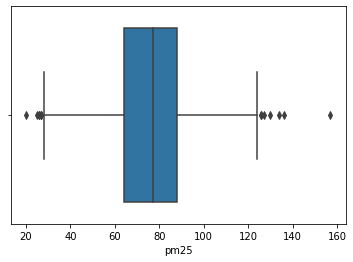

In [2065]:
sns.boxplot(data = dataset, x = "pm25")

<AxesSubplot: xlabel='so2'>

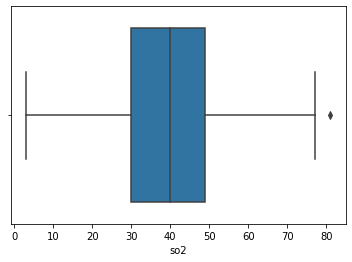

In [2066]:
sns.boxplot(data = dataset, x = "so2")

<AxesSubplot: xlabel='co'>

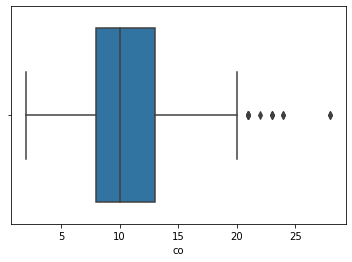

In [2067]:
sns.boxplot(data = dataset, x = "co")

<AxesSubplot: xlabel='o3'>

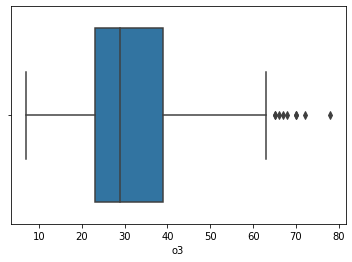

In [2068]:
sns.boxplot(data = dataset, x = "o3")

<AxesSubplot: xlabel='no2'>

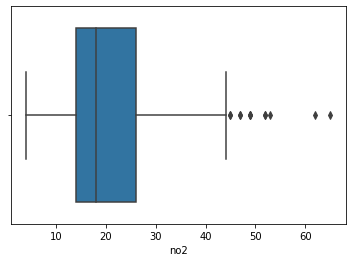

In [2069]:
sns.boxplot(data = dataset, x = "no2")

#KESIMPULAN

1. Missing value handling
1.1. pm10      : mean kelas
1.2. pm25      : mean kelas
1.3. so2       : mean
1.4. co        : median
1.5. o3        : median
1.6. no2       : median

2. Join kategori sedang dan tidak sehat menjadi tidak baik

3. Balancing label baik dan tidak baik

4. Outlier removal

In [2070]:
dataset = pd.concat([x_train, y_train], axis = 1)

valid_set = pd.concat([x_valid, y_valid], axis = 1)

test_set = pd.concat([x_test, y_test], axis = 1)

In [2071]:
dataset.categori.value_counts()

BAIK           469
TIDAK SEHAT     60
Name: categori, dtype: int64

In [2072]:
valid_set.categori.value_counts()

BAIK           101
TIDAK SEHAT     13
Name: categori, dtype: int64

In [2073]:
test_set.categori.value_counts()

BAIK           101
TIDAK SEHAT     13
Name: categori, dtype: int64

HANDLING MISSING VALUE

In [2074]:
# TRAIN SET
def nan_detector(set_data):
    set_data = set_data.copy()
    set_data.replace(-1, np.nan, inplace = True)
    return set_data

In [2075]:
dataset.describe()

,pm10,pm25,so2,co,o3,no2
count,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000
mean,50.646503,75.311909,35.077505,10.862004,30.648393,20.240076
std,16.338564,22.476568,17.091876,4.089650,13.608194,9.498655
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,45.000000,63.000000,28.000000,8.000000,22.000000,14.000000
50%,53.000000,76.000000,38.000000,10.000000,29.000000,18.000000
75%,60.000000,88.000000,47.000000,13.000000,39.000000,26.000000
max,179.000000,157.000000,81.000000,28.000000,78.000000,65.000000


In [2076]:
dataset.isnull().sum()

stasiun     0
pm10        0
pm25        0
so2         0
co          0
o3          0
no2         0
categori    0
dtype: int64

In [2077]:
dataset = nan_detector(dataset)

In [2078]:
dataset.isnull().sum()

stasiun      0
pm10        15
pm25         8
so2         53
co           1
o3          16
no2          1
categori     0
dtype: int64

In [2079]:
# VALIDSET

valid_set.describe()

,pm10,pm25,so2,co,o3,no2
count,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000
mean,49.982456,77.631579,32.500000,11.421053,26.894737,20.657895
std,15.925703,19.589713,18.657723,5.232463,11.379510,9.974152
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,47.000000,66.500000,25.000000,8.250000,19.250000,14.000000
50%,53.000000,76.500000,34.500000,11.000000,26.500000,18.000000
75%,60.000000,90.000000,44.750000,14.000000,32.750000,28.000000
max,76.000000,131.000000,82.000000,44.000000,58.000000,57.000000


In [2080]:
valid_set.isnull().sum()

stasiun     0
pm10        0
pm25        0
so2         0
co          0
o3          0
no2         0
categori    0
dtype: int64

In [2081]:
valid_set = nan_detector(valid_set)

In [2082]:
valid_set.isnull().sum()

stasiun      0
pm10         5
pm25         1
so2         18
co           1
o3           4
no2          2
categori     0
dtype: int64

In [2083]:
# TEST SET

test_set.describe()

,pm10,pm25,so2,co,o3,no2
count,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000
mean,50.201754,75.078947,33.385965,10.666667,29.438596,19.403509
std,16.020551,24.425123,18.394165,3.914273,13.277191,9.515446
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,43.000000,62.000000,26.000000,8.000000,21.000000,12.250000
50%,53.000000,79.000000,40.000000,10.000000,29.000000,18.000000
75%,60.000000,91.750000,45.000000,13.000000,35.750000,25.750000
max,82.000000,140.000000,81.000000,23.000000,73.000000,46.000000


In [2084]:
test_set.isnull().sum()

stasiun     0
pm10        0
pm25        0
so2         0
co          0
o3          0
no2         0
categori    0
dtype: int64

In [2085]:
test_set = nan_detector(test_set)

In [2086]:
test_set.isnull().sum()

stasiun      0
pm10         4
pm25         3
so2         16
co           1
o3           4
no2          2
categori     0
dtype: int64

HANDLING in PM10

In [2087]:
# TRAINSET

impute_1 = int(dataset[dataset.categori == "BAIK"].pm10.mean())
impute_0 = int(dataset[dataset.categori == "TIDAK SEHAT"].pm10.mean())

In [2088]:
impute_1, impute_0

(50, 70)

In [2089]:
dataset[dataset.categori == "BAIK"].pm10.isnull().sum(), dataset[dataset.categori == "TIDAK SEHAT"].pm10.isnull().sum()

(7, 8)

In [2090]:
dataset.loc[dataset[(dataset.categori == "BAIK") & (dataset.pm10.isnull() == True)].index, "pm10"] = impute_1
dataset.loc[dataset[(dataset.categori == "TIDAK SEHAT") & (dataset.pm10.isnull() == True)].index, "pm10"] = impute_0

In [2091]:
dataset[dataset.categori == "BAIK"].pm10.isnull().sum(), dataset[dataset.categori == "TIDAK SEHAT"].pm10.isnull().sum()

(0, 0)

In [2092]:
# VALIDSET

valid_set[valid_set.categori == "BAIK"].pm10.isnull().sum(), valid_set[valid_set.categori == "TIDAK SEHAT"].pm10.isnull().sum()

(3, 2)

In [2093]:
valid_set.loc[valid_set[(valid_set.categori == "BAIK") & (valid_set.pm10.isnull() == True)].index, "pm10"] = impute_1
valid_set.loc[valid_set[(valid_set.categori == "TIDAK SEHAT") & (valid_set.pm10.isnull() == True)].index, "pm10"] = impute_0

In [2094]:
valid_set[valid_set.categori == "BAIK"].pm10.isnull().sum(), valid_set[valid_set.categori == "TIDAK SEHAT"].pm10.isnull().sum()

(0, 0)

In [2095]:
# TEST SET

valid_set[valid_set.categori == "BAIK"].pm10.isnull().sum(), valid_set[valid_set.categori == "TIDAK SEHAT"].pm10.isnull().sum()

(0, 0)

In [2096]:
test_set.loc[test_set[(test_set.categori == "BAIK") & (test_set.pm10.isnull() == True)].index, "pm10"] = impute_1
test_set.loc[test_set[(test_set.categori == "TIDAK SEHAT") & (test_set.pm10.isnull() == True)].index, "pm10"] = impute_0

In [2097]:
test_set[test_set.categori == "BAIK"].pm10.isnull().sum(), test_set[test_set.categori == "TIDAK SEHAT"].pm10.isnull().sum()

(0, 0)

HANDLING in PM25

In [2098]:
impute_1 = int(dataset[dataset.categori == "BAIK"].pm25.mean())
impute_0 = int(dataset[dataset.categori == "TIDAK SEHAT"].pm25.mean())

In [2099]:
impute_1, impute_0

(72, 110)

In [2100]:
dataset[dataset.categori == "BAIK"].pm25.isnull().sum(), dataset[dataset.categori == "TIDAK BAIK"].pm25.isnull().sum()

(8, 0)

In [2101]:
dataset.loc[dataset[(dataset.categori == "BAIK") & (dataset.pm25.isnull() == True)].index, "pm25"] = impute_1
dataset.loc[dataset[(dataset.categori == "TIDAK SEHAT") & (dataset.pm25.isnull() == True)].index, "pm25"] = impute_0

In [2102]:
dataset[dataset.categori == "BAIK"].pm10.isnull().sum(), dataset[dataset.categori == "TIDAK SEHAT"].pm10.isnull().sum()

(0, 0)

In [2103]:
# VALID SET
valid_set[valid_set.categori == "BAIK"].pm25.isnull().sum(), valid_set[valid_set.categori == "TIDAK SEHAT"].pm25.isnull().sum()

(1, 0)

In [2104]:
valid_set.loc[valid_set[(valid_set.categori == "BAIK") & (valid_set.pm25.isnull() == True)].index, "pm25"] = impute_1
valid_set.loc[valid_set[(valid_set.categori == "TIDAK SEHAT") & (valid_set.pm25.isnull() == True)].index, "pm25"] = impute_0

In [2105]:
dataset[dataset.categori == "BAIK"].pm10.isnull().sum(), dataset[dataset.categori == "TIDAK SEHAT"].pm10.isnull().sum()

(0, 0)

In [2106]:
#TEST SET

test_set[test_set.categori == "BAIK"].pm25.isnull().sum(), test_set[test_set.categori == "TIDAK SEHAT"].pm25.isnull().sum()

(3, 0)

In [2107]:
test_set.loc[test_set[(test_set.categori == "BAIK") & (test_set.pm25.isnull() == True)].index, "pm25"] = impute_1
test_set.loc[test_set[(test_set.categori == "TIDAK SEHAT") & (test_set.pm25.isnull() == True)].index, "pm25"] = impute_0

HANDLING in SO2, CO, O3, NO2

In [2108]:
impute_so2 = int(dataset.so2.mean())
impute_co = int(dataset.co.median())
impute_o3 = int(dataset.o3.median())
impute_no2 = int(dataset.no2.median())

In [2109]:
impute_values = {"so2" : impute_so2, "co" : impute_co, "o3" : impute_o3, "no2" : impute_no2}

In [2110]:
impute_values

{'so2': 39, 'co': 10, 'o3': 29, 'no2': 18}

In [2111]:
dataset.isnull().sum()

stasiun      0
pm10         0
pm25         0
so2         53
co           1
o3          16
no2          1
categori     0
dtype: int64

In [2112]:
dataset.fillna(value = impute_values, inplace = True)

In [2113]:
dataset.isnull().sum()

stasiun     0
pm10        0
pm25        0
so2         0
co          0
o3          0
no2         0
categori    0
dtype: int64

In [2114]:
# VALID TEST
valid_set.isnull().sum()

stasiun      0
pm10         0
pm25         0
so2         18
co           1
o3           4
no2          2
categori     0
dtype: int64

In [2115]:
valid_set.fillna(value = impute_values, inplace = True)

In [2116]:
valid_set.isnull().sum()

stasiun     0
pm10        0
pm25        0
so2         0
co          0
o3          0
no2         0
categori    0
dtype: int64

In [2117]:
# TEST SET

test_set.isnull().sum()

stasiun      0
pm10         0
pm25         0
so2         16
co           1
o3           4
no2          2
categori     0
dtype: int64

In [2118]:
test_set.fillna(value = impute_values, inplace = True)

In [2119]:
test_set.isnull().sum()

stasiun     0
pm10        0
pm25        0
so2         0
co          0
o3          0
no2         0
categori    0
dtype: int64

ENCODING STATIUN


In [2120]:
# TRAIN SET

stasiun_features = ohe_statiun.transform(np.array(dataset.stasiun.to_list()).reshape(-1, 1))

In [2121]:
stasiun_features = pd.DataFrame(stasiun_features, columns = dataset['stasiun'].unique())

In [2122]:
stasiun_features.set_index(dataset.index, inplace = True)

In [2123]:
dataset = pd.concat([stasiun_features, dataset], axis = 1)

In [2124]:
dataset.drop(columns = "stasiun", inplace = True)

In [2125]:
#VALIDSET

stasiun_features = ohe_statiun.transform(np.array(valid_set.stasiun.to_list()).reshape(-1, 1))

In [2126]:
stasiun_features = pd.DataFrame(stasiun_features, columns = valid_set["stasiun"].unique())

In [2127]:
stasiun_features.set_index(valid_set.index, inplace = True)

In [2128]:
valid_set = pd.concat([stasiun_features, valid_set], axis = 1)

In [2129]:
valid_set.drop(columns = "stasiun", inplace = True)

In [2130]:
#TEST SET

stasiun_features = ohe_statiun.transform(np.array(test_set.stasiun.to_list()).reshape(-1, 1))

In [2131]:
stasiun_features = pd.DataFrame(stasiun_features, columns = test_set["stasiun"].unique())

In [2132]:
stasiun_features.set_index(test_set.index, inplace = True)

In [2133]:
test_set = pd.concat([stasiun_features, test_set], axis = 1)

In [2134]:
test_set.drop(columns = "stasiun", inplace = True)

BALANCING LABEL

<AxesSubplot: xlabel='categori', ylabel='Count'>

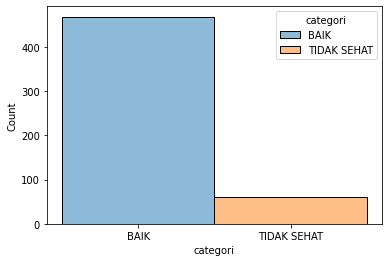

In [2135]:
sns.histplot(data = dataset, x = "categori", hue = "categori")

UNDERSAMPLING

In [2136]:
rus = RandomUnderSampler(random_state = 26)

In [2137]:
x_rus, y_rus = rus.fit_resample(dataset.drop("categori", axis = 1), dataset.categori)

In [2138]:
y_rus

0             BAIK
1             BAIK
2             BAIK
3             BAIK
4             BAIK
          ...     
115    TIDAK SEHAT
116    TIDAK SEHAT
117    TIDAK SEHAT
118    TIDAK SEHAT
119    TIDAK SEHAT
Name: categori, Length: 120, dtype: object

In [2139]:
dataset_rus = pd.concat([x_rus, y_rus], axis = 1)

<AxesSubplot: xlabel='categori', ylabel='Count'>

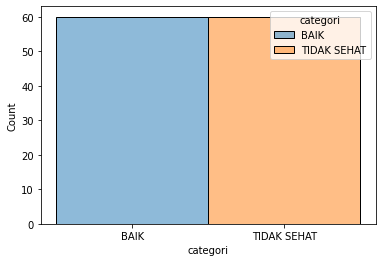

In [2140]:
sns.histplot(dataset_rus, x = "categori", hue = "categori")

OVERSAMPLING

In [2141]:
ros = RandomOverSampler(random_state = 11)

In [2142]:
x_ros, y_ros = ros.fit_resample(dataset.drop("categori", axis = 1), dataset.categori)

In [2143]:
dataset_ros = pd.concat([x_ros, y_ros], axis = 1)

<AxesSubplot: xlabel='categori', ylabel='Count'>

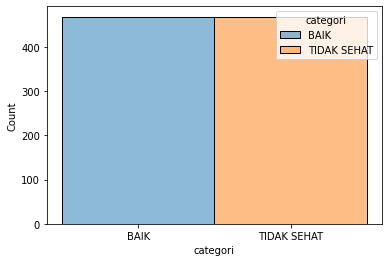

In [2144]:
sns.histplot(dataset_ros, x = "categori", hue = "categori")

SMOTE

In [2145]:
sm = SMOTE(random_state = 112)

In [2146]:
x_sm, y_sm = sm.fit_resample(dataset.drop("categori", axis = 1), dataset.categori)

In [2147]:
dataset_ros = pd.concat([x_ros, y_ros], axis = 1)

<AxesSubplot: xlabel='categori', ylabel='Count'>

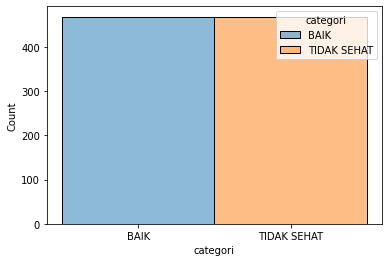

In [2148]:
sns.histplot(dataset_ros, x = "categori", hue = "categori")

LABEL ENCODING

In [2149]:
le_categori = LabelEncoder()

In [2150]:
dataset['categori'] = le_categori.fit_transform(dataset['categori'])
valid_set['categori'] = le_categori.fit_transform(valid_set['categori'])
test_set['categori'] = le_categori.fit_transform(test_set['categori'])

In [2151]:
y_train = le_categori.fit_transform(y_train)


In [2152]:
joblib.dump(y_train, "/Users/avntrr/Documents/Pacmann/y_train.pkl")
y_train = joblib.load("/Users/avntrr/Documents/Pacmann/y_train.pkl")

In [2153]:
# dataset.drop(columns = "categori", inplace = True)
# valid_set.drop(columns = "categori", inplace = True)
# test_set.drop(columns = "categori", inplace = True)

y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [2154]:
y_rus = le_categori.fit_transform(y_rus)

In [2155]:
joblib.dump(y_rus, "/Users/avntrr/Documents/Pacmann/y_rus.pkl")
y_rus = joblib.load("/Users/avntrr/Documents/Pacmann/y_rus.pkl")

In [2156]:
joblib.dump(x_rus, "/Users/avntrr/Documents/Pacmann/x_rus.pkl")
joblib.dump(y_rus, "/Users/avntrr/Documents/Pacmann/y_rus.pkl")

joblib.dump(x_ros, "/Users/avntrr/Documents/Pacmann/x_ros.pkl")
joblib.dump(y_ros, "/Users/avntrr/Documents/Pacmann/y_ros.pkl")

joblib.dump(x_sm, "/Users/avntrr/Documents/Pacmann/x_sm.pkl")
joblib.dump(y_sm, "/Users/avntrr/Documents/Pacmann/y_sm.pkl")

joblib.dump(valid_set.drop(columns = "categori"), "/Users/avntrr/Documents/Pacmann/x_valid_feng.pkl")
joblib.dump(valid_set.categori, "/Users/avntrr/Documents/Pacmann/y_valid_feng.pkl")

joblib.dump(test_set.drop(columns = "categori"), "/Users/avntrr/Documents/Pacmann/x_test_feng.pkl")
joblib.dump(test_set.categori, "/Users/avntrr/Documents/Pacmann/y_test_feng.pkl")

['/Users/avntrr/Documents/Pacmann/y_test_feng.pkl']

In [2157]:
x_rus = joblib.load("/Users/avntrr/Documents/Pacmann/x_rus.pkl")
y_rus = joblib.load("/Users/avntrr/Documents/Pacmann/y_rus.pkl")

x_ros = joblib.load("/Users/avntrr/Documents/Pacmann/x_ros.pkl")
y_ros = joblib.load("/Users/avntrr/Documents/Pacmann/y_ros.pkl")

x_sm = joblib.load("/Users/avntrr/Documents/Pacmann/x_sm.pkl")
y_sm = joblib.load("/Users/avntrr/Documents/Pacmann/y_sm.pkl")

x_valid = joblib.load("/Users/avntrr/Documents/Pacmann/x_valid_feng.pkl")
y_valid = joblib.load("/Users/avntrr/Documents/Pacmann/y_valid_feng.pkl")

x_test = joblib.load("/Users/avntrr/Documents/Pacmann/x_test_feng.pkl")
y_test = joblib.load("/Users/avntrr/Documents/Pacmann/y_test_feng.pkl")

In [2158]:
def time_stamp():
    return datetime.now()

In [2159]:
def create_log_template():
    logger = {
        "model_name" : [],
        "model_uid" : [],
        "training_time" : [],
        "training_date" : [],
        "performance" : [],
        "f1_score_avg" : [],
        "data_configurations" : [],
    }

    return logger

In [2160]:
def training_log_updater(current_log, log_path):
    current_log = current_log.copy()

    try:
        with open(log_path, "r") as file:
            last_log = json.load(file)
        file.close()
    except FileNotFoundError as ffe:
        with open(log_path, "w") as file:
            file.write("[]")
        file.close()
        with open(log_path, "r") as file:
            last_log = json.load(file)
        file.close()
    
    last_log.append(current_log)

    with open(log_path, "w") as file:
        json.dump(last_log, file)
        file.close()

    return last_log

TRAINING AND EVALUATION
Create Model Object

In [2161]:
lgr_baseline = LogisticRegression()
dct_baseline = DecisionTreeClassifier()
rfc_baseline = RandomForestClassifier()
knn_baseline = KNeighborsClassifier()
xgb_baseline = XGBClassifier()

In [2162]:
list_of_model = {
    "undersampling" : [
        { "model_name": lgr_baseline.__class__.__name__, "model_object": lgr_baseline, "model_uid": ""},
        { "model_name": dct_baseline.__class__.__name__, "model_object": dct_baseline, "model_uid": ""},
        { "model_name": rfc_baseline.__class__.__name__, "model_object": rfc_baseline, "model_uid": ""},
        { "model_name": knn_baseline.__class__.__name__, "model_object": knn_baseline, "model_uid": ""},
        { "model_name": xgb_baseline.__class__.__name__, "model_object": xgb_baseline, "model_uid": ""}
        ],
    "oversampling" : [
        { "model_name": lgr_baseline.__class__.__name__, "model_object": lgr_baseline, "model_uid": ""},
        { "model_name": dct_baseline.__class__.__name__, "model_object": dct_baseline, "model_uid": ""},
        { "model_name": rfc_baseline.__class__.__name__, "model_object": rfc_baseline, "model_uid": ""},
        { "model_name": knn_baseline.__class__.__name__, "model_object": knn_baseline, "model_uid": ""},
        { "model_name": xgb_baseline.__class__.__name__, "model_object": xgb_baseline, "model_uid": ""}
        ],
    "smote" : [
        { "model_name": lgr_baseline.__class__.__name__, "model_object": lgr_baseline, "model_uid": ""},
        { "model_name": dct_baseline.__class__.__name__, "model_object": dct_baseline, "model_uid": ""},
        { "model_name": rfc_baseline.__class__.__name__, "model_object": rfc_baseline, "model_uid": ""},
        { "model_name": knn_baseline.__class__.__name__, "model_object": knn_baseline, "model_uid": ""},
        { "model_name": xgb_baseline.__class__.__name__, "model_object": xgb_baseline, "model_uid": ""}
        ],
    }

TRAINING MODEL

In [2163]:
def train_eval_model(list_of_model, prefix_model_name, x_train, y_train, data_configuration_name, x_valid, y_valid, log_path):

    list_of_model = copy.deepcopy(list_of_model)
    logger = create_log_template()

    for model in tqdm(list_of_model):    
        model_name = prefix_model_name + "-" + model["model_name"]

        start_time = time_stamp()
        model["model_object"].fit(x_train, y_train)
        finished_time = time_stamp()

        elapsed_time = finished_time - start_time
        elapsed_time = elapsed_time.total_seconds()

        y_pred = model["model_object"].predict(x_valid)
        performance = classification_report(y_valid, y_pred, output_dict = True)

        plain_id = str(start_time) + str(finished_time)
        chiper_id = hashlib.md5(plain_id.encode()).hexdigest()

        model["model_uid"] = chiper_id

        logger["model_name"].append(model_name)
        logger["model_uid"].append(chiper_id)
        logger["training_time"].append(elapsed_time)
        logger["training_date"].append(str(start_time))
        logger["performance"].append(performance)
        logger["f1_score_avg"].append(performance["macro avg"]["f1-score"])
        logger["data_configurations"].append(data_configuration_name)

    training_log = training_log_updater(logger, log_path)

    return training_log, list_of_model

In [2164]:
training_log, list_of_model_rus = train_eval_model(
    list_of_model["undersampling"],
    "baseline_model",
    x_rus,
    y_rus,
    "undersampling",
    x_valid,
    y_valid,
    "log/training_log.json"
)

  0%|          | 0/5 [00:00<?, ?it/s]/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn

ValueError: feature_names mismatch: ['DKI4 (Lubang Buaya)', 'DKI1 (Bunderan HI)', 'DKI2 (Kelapa Gading)', 'DKI5 (Kebon Jeruk) Jakarta Barat', 'DKI3 (Jagakarsa)', 'pm10', 'pm25', 'so2', 'co', 'o3', 'no2'] ['DKI5 (Kebon Jeruk) Jakarta Barat', 'DKI4 (Lubang Buaya)', 'DKI3 (Jagakarsa)', 'DKI1 (Bunderan HI)', 'DKI2 (Kelapa Gading)', 'pm10', 'pm25', 'so2', 'co', 'o3', 'no2']

0             BAIK
1             BAIK
2             BAIK
3             BAIK
4             BAIK
          ...     
933    TIDAK SEHAT
934    TIDAK SEHAT
935    TIDAK SEHAT
936    TIDAK SEHAT
937    TIDAK SEHAT
Name: categori, Length: 938, dtype: object

In [2173]:
x_train

,stasiun,pm10,pm25,so2,co,o3,no2
251,DKI4 (Lubang Buaya),56,86,42,8,21,21
474,DKI1 (Bunderan HI),52,63,39,13,23,11
203,DKI2 (Kelapa Gading),52,73,50,8,68,10
585,DKI5 (Kebon Jeruk) Jakarta Barat,25,44,22,5,15,21
386,DKI3 (Jagakarsa),29,41,42,4,27,6
...,...,...,...,...,...,...,...
332,DKI1 (Bunderan HI),19,20,29,5,14,4
313,DKI1 (Bunderan HI),55,73,32,14,17,38
49,DKI2 (Kelapa Gading),46,63,60,16,42,29
111,DKI4 (Lubang Buaya),52,80,41,18,31,23
